# BITCOIN PRICE PREDICTION

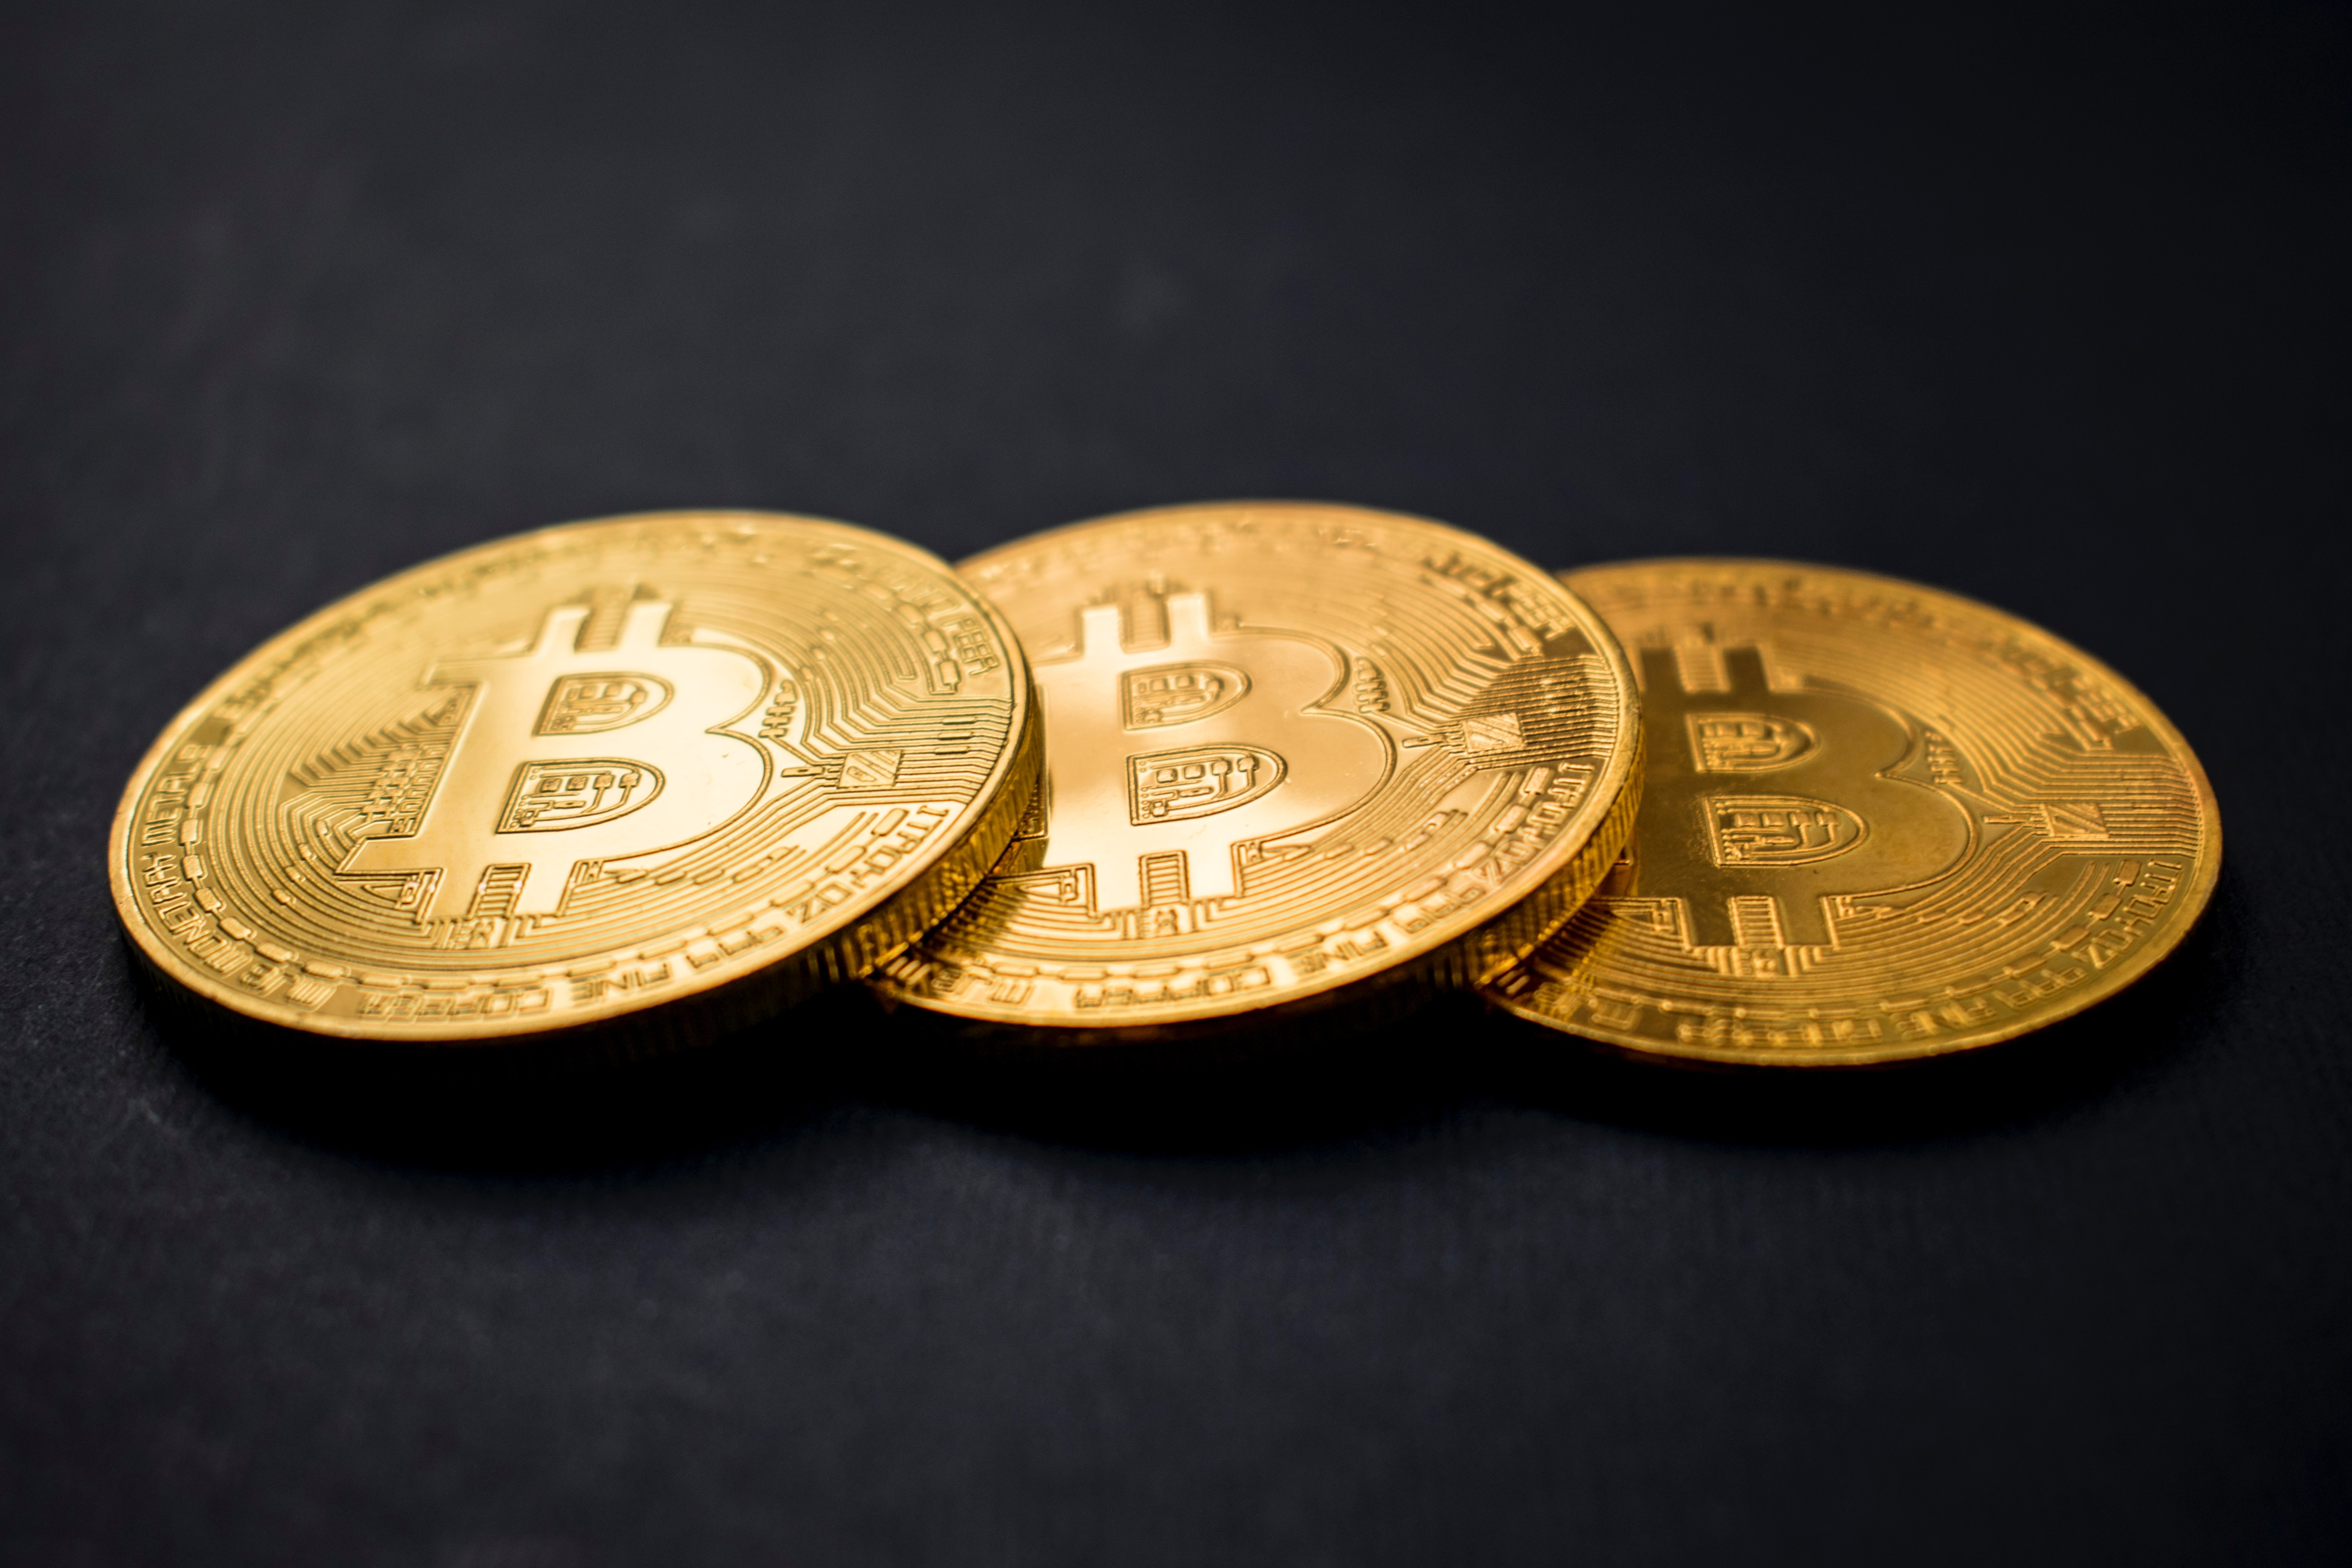

In [1]:
#import library
from IPython.display import Image
#load image from local storage
Image(filename = r'F:\IBM_prjkt\bitcoin.jpg',width=1000,height=300)

* IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for data preprocessing and processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#for modelling of data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score

* Loading the datasets 

In [3]:
data_1 = pd.read_csv(r'F:\IBM_prjkt\bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')
data_2 = pd.read_csv(r'F:\IBM_prjkt\coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [4]:
data_1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Check if any NaN values are present

In [6]:
missing_val = data_1.isnull().sum()    #Too many null values
missing_val.to_frame()
missing_val.sort_values(missing_val[0],inplace=True)

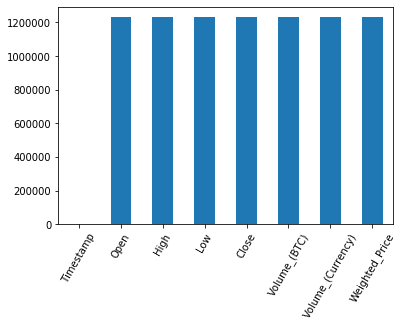

In [7]:
missing_val.plot.bar( rot=60)
plt.show()

In [8]:
data_2.isnull().sum()    #Too many null values

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [9]:
missing_val = data_2.isnull().sum()    #Too many null values
missing_val.to_frame()
missing_val.sort_values(missing_val[0],inplace=True)

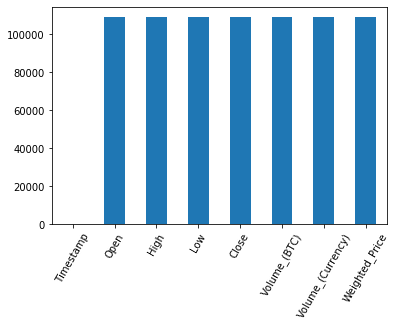

In [10]:
missing_val.plot.bar( rot=60)
plt.show()

* Shape of the datasets

In [11]:
print('The number of rows in dataset_1 are {} and columns are {}'.format(data_1.shape[0],data_1.shape[1]))
print('The number of rows in dataset_2 are {} and columns are {}'.format(data_2.shape[0],data_2.shape[1]))

The number of rows in dataset_1 are 3997697 and columns are 8
The number of rows in dataset_2 are 2099760 and columns are 8


Checking Datatypes

In [12]:
data_1.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [13]:
data_2.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

* Info about datasets

In [14]:
data_1.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.997697e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06
mean,1.445483e+09,3.059659e+03,3.062027e+03,3.057022e+03,3.059638e+03,1.042232e+01,2.686812e+04,3.059499e+03
std,6.940318e+07,3.741168e+03,3.744835e+03,3.736985e+03,3.741134e+03,3.375010e+01,9.620425e+04,3.740910e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.385283e+09,3.742700e+02,3.745200e+02,3.740000e+02,3.742500e+02,4.530000e-01,2.865515e+02,3.742434e+02
50%,1.445637e+09,7.794500e+02,7.799100e+02,7.790100e+02,7.794900e+02,2.100451e+00,2.209966e+03,7.794137e+02
75%,1.505603e+09,5.635745e+03,5.639500e+03,5.631100e+03,5.635355e+03,8.179424e+00,1.554689e+04,5.635118e+03
max,1.565568e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,7.569437e+06,1.966330e+04


In [15]:
data_1.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.997697e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06
mean,1.445483e+09,3.059659e+03,3.062027e+03,3.057022e+03,3.059638e+03,1.042232e+01,2.686812e+04,3.059499e+03
std,6.940318e+07,3.741168e+03,3.744835e+03,3.736985e+03,3.741134e+03,3.375010e+01,9.620425e+04,3.740910e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.385283e+09,3.742700e+02,3.745200e+02,3.740000e+02,3.742500e+02,4.530000e-01,2.865515e+02,3.742434e+02
50%,1.445637e+09,7.794500e+02,7.799100e+02,7.790100e+02,7.794900e+02,2.100451e+00,2.209966e+03,7.794137e+02
75%,1.505603e+09,5.635745e+03,5.639500e+03,5.631100e+03,5.635355e+03,8.179424e+00,1.554689e+04,5.635118e+03
max,1.565568e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,7.569437e+06,1.966330e+04


Converting the datatype of Timestamp column into DateTime

In [16]:
data_1['Timestamp'] = pd.to_datetime(data_1['Timestamp'],unit="s")
data_2['Timestamp'] = pd.to_datetime(data_2['Timestamp'],unit="s")

In [17]:
data_1['Timestamp'].head()

0   2011-12-31 07:52:00
1   2011-12-31 07:53:00
2   2011-12-31 07:54:00
3   2011-12-31 07:55:00
4   2011-12-31 07:56:00
Name: Timestamp, dtype: datetime64[ns]

In [18]:
data_2['Timestamp'].head()

0   2014-12-01 05:33:00
1   2014-12-01 05:34:00
2   2014-12-01 05:35:00
3   2014-12-01 05:36:00
4   2014-12-01 05:37:00
Name: Timestamp, dtype: datetime64[ns]

##  Data Preprocessing

Treating NaN's first

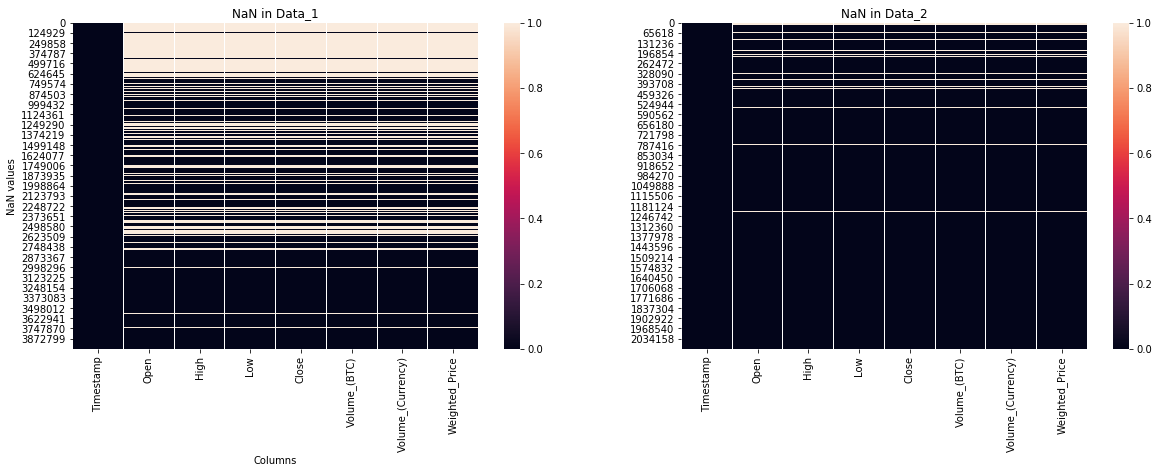

In [19]:
plt.figure(figsize=(20,6))
plt.subplot(121)
bar = sns.heatmap(data_1.isnull())   #NaN presence plot using heatmap
bar.set_title('NaN in Data_1')
bar.set_xlabel('Columns')
bar.set_ylabel('NaN values')
plt.subplot(122)
bar = sns.heatmap(data_2.isnull())   #NaN presence plot using heatmap
bar.set_title('NaN in Data_2')
plt.show()

* Filling the NaN using Mean

In [20]:
data_1['Open'].fillna(np.mean(data_1['Open']),inplace=True)
data_2['Open'].fillna(np.mean(data_1['Open']),inplace=True)
data_1['High'].fillna(np.mean(data_1['High']),inplace=True)
data_2['High'].fillna(np.mean(data_1['High']),inplace=True)
data_1['Low'].fillna(np.mean(data_1['Low']),inplace=True)
data_2['Low'].fillna(np.mean(data_1['Low']),inplace=True)
data_1['Close'].fillna(np.mean(data_1['Close']),inplace=True)
data_2['Close'].fillna(np.mean(data_1['Close']),inplace=True)
data_1['Volume_(BTC)'].fillna(np.mean(data_1['Volume_(BTC)']),inplace=True)
data_2['Volume_(BTC)'].fillna(np.mean(data_1['Volume_(BTC)']),inplace=True)
data_1['Volume_(Currency)'].fillna(np.mean(data_1['Volume_(Currency)']),inplace=True)
data_2['Volume_(Currency)'].fillna(np.mean(data_1['Volume_(Currency)']),inplace=True)
data_1['Weighted_Price'].fillna(np.mean(data_1['Weighted_Price']),inplace=True)
data_2['Weighted_Price'].fillna(np.mean(data_1['Weighted_Price']),inplace=True)

In [21]:
data_1.isnull().sum().to_frame()

,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume_(BTC),0
Volume_(Currency),0
Weighted_Price,0


In [22]:
data_2.isnull().sum().to_frame()

,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume_(BTC),0
Volume_(Currency),0
Weighted_Price,0


Resampling the datatime : Instead of using all the datetime values we are taking the average over a month

In [23]:
dataframe1=data_1
dataframe2=data_2
dataframe1.index = dataframe1.Timestamp
dataframe2.index = dataframe2.Timestamp
dataframe1 = dataframe1.resample('m').mean()
dataframe2 = dataframe2.resample('m').mean()
print('The number of rows in dataset_1 are {} and columns are {}'.format(dataframe1.shape[0],data_1.shape[1]))
print('The number of rows in dataset_2 are {} and columns are {}'.format(dataframe2.shape[0],data_2.shape[1]))

The number of rows in dataset_1 are 93 and columns are 8
The number of rows in dataset_2 are 50 and columns are 8


## Data Exploration

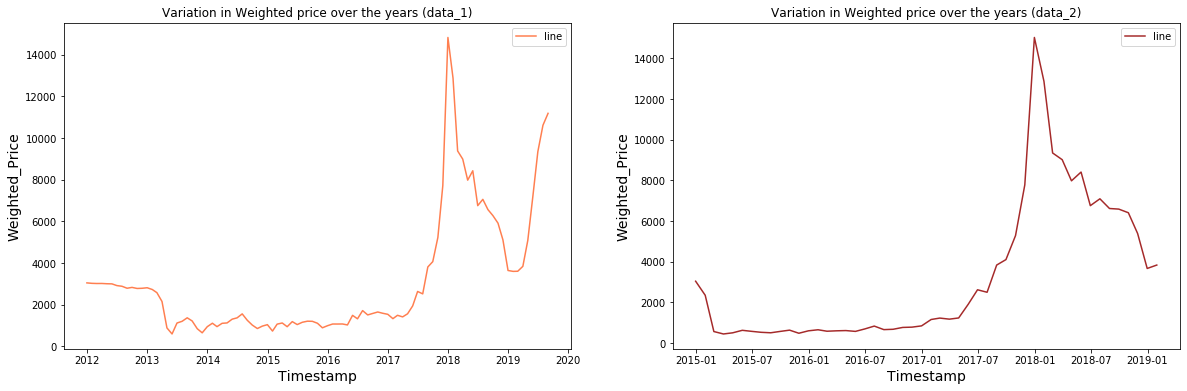

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(121)      
sns.lineplot(x=dataframe1.index,y=dataframe1.Weighted_Price, color="coral", label="line")
plt.title('Variation in Weighted price over the years (data_1)')
plt.xlabel('Timestamp',fontsize=14)
plt.ylabel('Weighted_Price',fontsize=14)
plt.subplot(122)      
sns.lineplot(x=dataframe2.index,y=dataframe2.Weighted_Price, color="brown", label="line")
plt.xlabel('Timestamp',fontsize=14)
plt.ylabel('Weighted_Price',fontsize=14)
plt.title('Variation in Weighted price over the years (data_2)')
plt.show()

As we can see there are significant changes between 2018 and 2019 we will have a look at the closing vales of the corresponding years

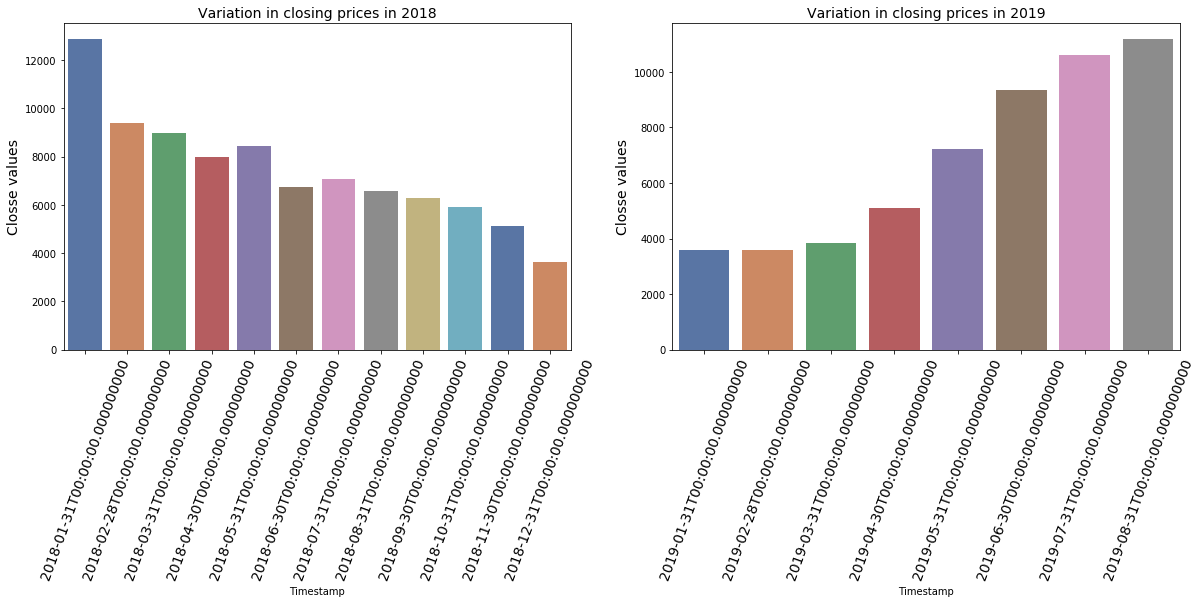

In [25]:
plt.figure(figsize=(20,6))
data2018 = dataframe1['2018']
data2019 = dataframe1['2019']
plt.subplot(121)
bar = sns.barplot(x=data2018.index,y=data2018.Close,palette = 'deep')
plt.ylabel('Closse values',fontsize=14)
plt.title('Variation in closing prices in 2018',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(), fontsize=14, rotation=70)
plt.subplot(122)
bar = sns.barplot(x=data2019.index,y=data2019.Close,palette = 'deep')
plt.ylabel('Closse values',fontsize=14)
plt.title('Variation in closing prices in 2019',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(), fontsize=14, rotation=70)
plt.show()

Now we will look at the attributes Volume_(BTC)	and Volume_(Currency) and how they are related. We will use scatter plot for this.

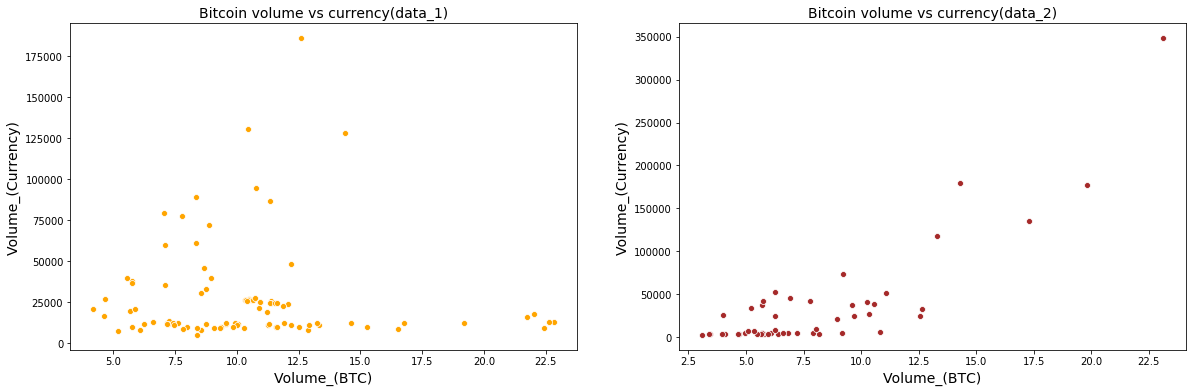

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.scatterplot(x='Volume_(BTC)',y='Volume_(Currency)',data = dataframe1 ,color='orange')
plt.title('Bitcoin volume vs currency(data_1)',fontsize=14)
plt.xlabel('Volume_(BTC)',fontsize=14)
plt.ylabel('Volume_(Currency)',fontsize=14)
plt.subplot(122)
sns.scatterplot(x='Volume_(BTC)',y='Volume_(Currency)',data = dataframe2 ,color='brown')
plt.title('Bitcoin volume vs currency(data_2)',fontsize=14)
plt.xlabel('Volume_(BTC)',fontsize=14)
plt.ylabel('Volume_(Currency)',fontsize=14)
plt.show()

In [27]:
dataframe1['Volume_(BTC)'].corr(dataframe1['Volume_(Currency)'])  #as we can see there is no much relation between them

-0.045749917010774944

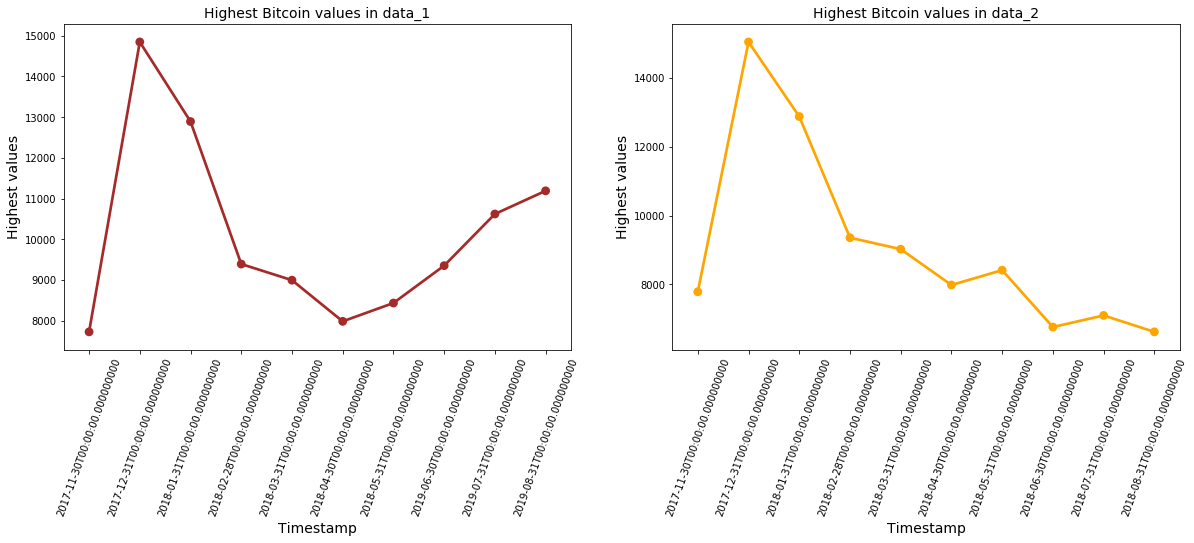

In [28]:
high_df1 = dataframe1.sort_values(by=['High'],ascending =False).head(10)
high_df2 = dataframe2.sort_values(by=['High'],ascending =False).head(10)

plt.figure(figsize=(20,6))
plt.subplot(121)
bar = sns.pointplot(x=high_df1.index,y=high_df1['High'],color='brown')
bar.set_xticklabels(bar.get_xticklabels(),rotation = 70)
bar.set_title('Highest Bitcoin values in data_1',fontsize=14)
bar.set_xlabel('Timestamp',fontsize=14)   #can use matplotlib func or seaborn while labelling the plots
bar.set_ylabel('Highest values',fontsize=14)

plt.subplot(122)
bar = sns.pointplot(x=high_df2.index,y=high_df2['High'],color='orange')
bar.set_xticklabels(bar.get_xticklabels(),rotation = 70)
bar.set_title('Highest Bitcoin values in data_2',fontsize=14)
bar.set_xlabel('Timestamp',fontsize=14)   #can use matplotlib func or seaborn while labelling the plots
bar.set_ylabel('Highest values',fontsize=14)
plt.show()

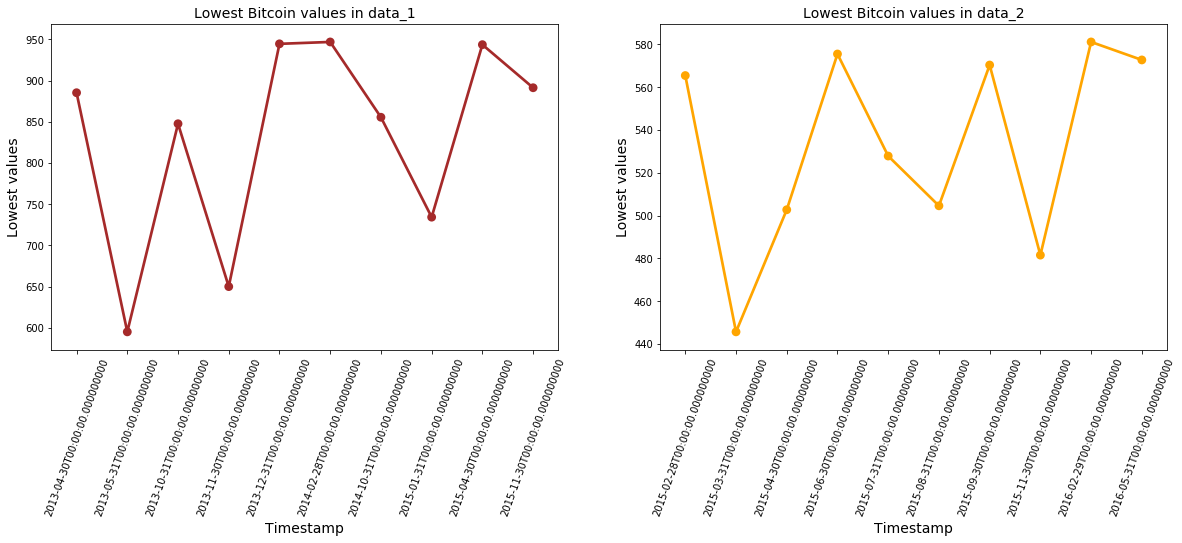

In [29]:
low_df1 = dataframe1.sort_values(by=['Low'],ascending =True).head(10)
low_df2 = dataframe2.sort_values(by=['Low'],ascending =True).head(10)

plt.figure(figsize=(20,6))
plt.subplot(121)
bar = sns.pointplot(x=low_df1.index,y=low_df1['Low'],color='brown')
bar.set_xticklabels(bar.get_xticklabels(),rotation = 70)
bar.set_title('Lowest Bitcoin values in data_1',fontsize=14)
bar.set_xlabel('Timestamp',fontsize=14)   #can use matplotlib func or seaborn while labelling the plots
bar.set_ylabel('Lowest values',fontsize=14)

plt.subplot(122)
bar = sns.pointplot(x=low_df2.index,y=low_df2['Low'],color='orange')
bar.set_xticklabels(bar.get_xticklabels(),rotation = 70)
bar.set_title('Lowest Bitcoin values in data_2',fontsize=14)
bar.set_xlabel('Timestamp',fontsize=14)   #can use matplotlib func or seaborn while labelling the plots
bar.set_ylabel('Lowest values',fontsize=14)
plt.show()

In [30]:
low_df1

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2013-05-31,595.540093,595.985019,594.991351,595.485126,8.394732,5130.413328,595.480136
2013-11-30,650.960689,651.829047,649.908069,650.892962,22.847183,12708.130418,650.847858
2015-01-31,734.904346,735.545550,734.205633,734.902035,22.428407,9515.159038,734.865889
2013-10-31,848.303774,848.946374,847.589318,848.295275,16.527848,8618.776222,848.258885
2014-10-31,856.199559,856.872644,855.462466,856.193813,15.290324,9649.265426,856.154953
2013-04-30,886.129584,886.911555,885.241365,886.112685,12.873303,8147.476408,886.073221
2015-11-30,892.117427,892.853430,891.297788,892.106554,22.630831,12854.031742,892.065309
2015-04-30,944.315089,944.968796,943.591291,944.308324,8.549585,8135.641395,944.270112
2013-12-31,946.336284,947.977986,944.592386,946.322056,22.030653,17936.437702,946.204577


In [31]:
low_df2

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2015-03-31,445.969924,446.241305,445.684931,445.980249,8.188753,3725.861710,445.966384
2015-11-30,481.857342,482.127375,481.533107,481.842495,9.182913,4490.045355,481.825793
2015-04-30,503.042899,503.334015,502.728595,503.046190,6.386673,3812.222331,503.032524
2015-08-31,504.862600,505.133449,504.569840,504.861968,5.956152,3643.602651,504.851095
2015-07-31,528.116538,528.389859,527.821109,528.117717,5.764401,3757.892567,528.105204
2015-02-28,565.849208,566.259147,565.423618,565.856275,7.889051,4727.078095,565.845248
2015-09-30,570.678425,570.988728,570.338361,570.676803,5.675641,4236.772250,570.661269
2016-05-31,572.934922,573.132819,572.714726,572.941484,4.645056,3100.855145,572.925403
2015-06-30,575.844856,576.168404,575.491124,575.843838,5.702604,4283.028054,575.828358


Finding correlation between different attributes.

C:\Users\Venkatesh M\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


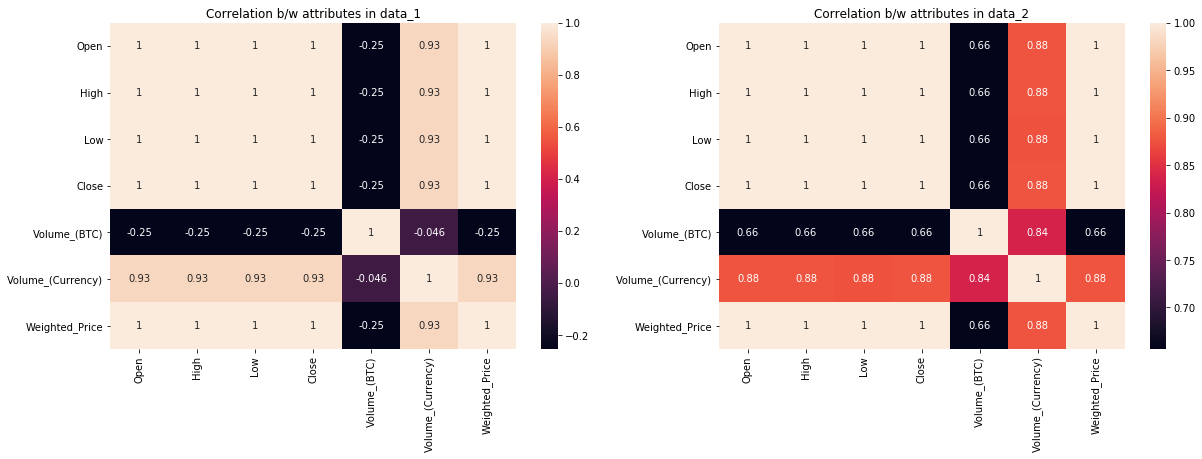

In [32]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.heatmap(dataframe1.corr(),annot=True)
plt.title('Correlation b/w attributes in data_1')
#plt.xlabel('Attributes',fontsize=14)
#plt.ylabel('Attributes',fontsize=14)
plt.subplot(122)      
plt.subplot(122)
sns.heatmap(dataframe2.corr(),annot=True)
plt.title('Correlation b/w attributes in data_2')
#plt.xlabel('Attributes',fontsize=14)
#plt.ylabel('Attributes',fontsize=14)
plt.show()

Now we look at the outliers in each attribute. We don't know whether these outliers will have a positive or negative effect so after finding the accuracy if it's less then we deal with outliers.

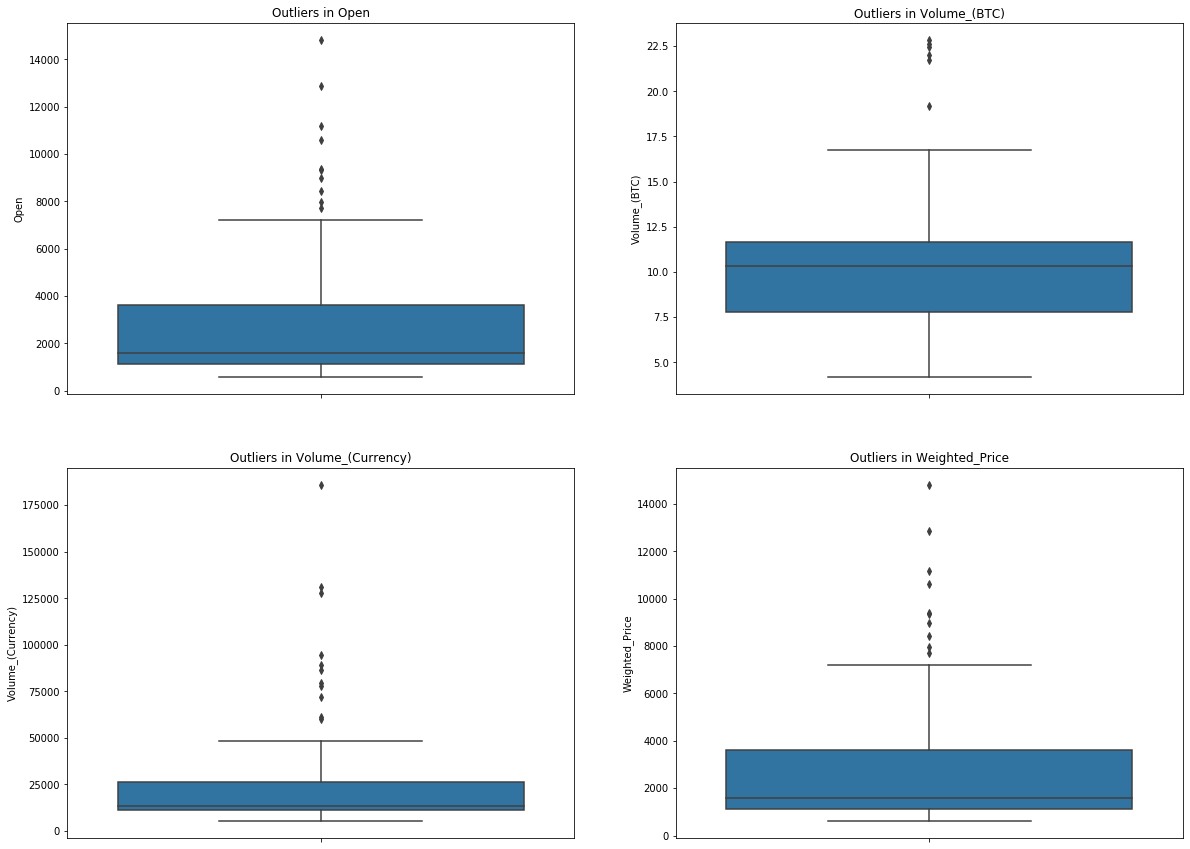

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.boxplot(dataframe1['Open'],orient='v')
plt.title('Outliers in Open')
plt.subplot(222)
sns.boxplot(dataframe1['Volume_(BTC)'],orient='v')
plt.title('Outliers in Volume_(BTC)')
plt.subplot(223)
sns.boxplot(dataframe1['Volume_(Currency)'],orient='v')
plt.title('Outliers in Volume_(Currency)')
plt.subplot(224)
sns.boxplot(dataframe1['Weighted_Price'],orient='v')
plt.title('Outliers in Weighted_Price')
plt.show()

# Data Processing

In [34]:
data = data_1
data['Timestamp']=data['Timestamp'].map(dt.datetime.toordinal)
x=data['Timestamp'].values
pd.DataFrame(x).head()

,0
0,734502
1,734502
2,734502
3,734502
4,734502


In [35]:
x=x.reshape(-1,1) #changing into column form [x_values_count,1]
y=data['Weighted_Price']
pd.DataFrame(x).head()

,0
0,734502
1,734502
2,734502
3,734502
4,734502


* Taking Timestamp as individual variable and doing the prediction

In [36]:
#Standardising the data
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [37]:
#splitting the data into training set and testing set
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)
scaler=MinMaxScaler()


In [38]:
#linear regression
linear_reg = LinearRegression()
linear_reg.fit(xtrain,ytrain)
y_pred = linear_reg.predict(xtest)
linear_accuracy = linear_reg.score(xtest,ytest)
print('r squared value is ',linear_accuracy)

r squared value is  0.2788524008010894


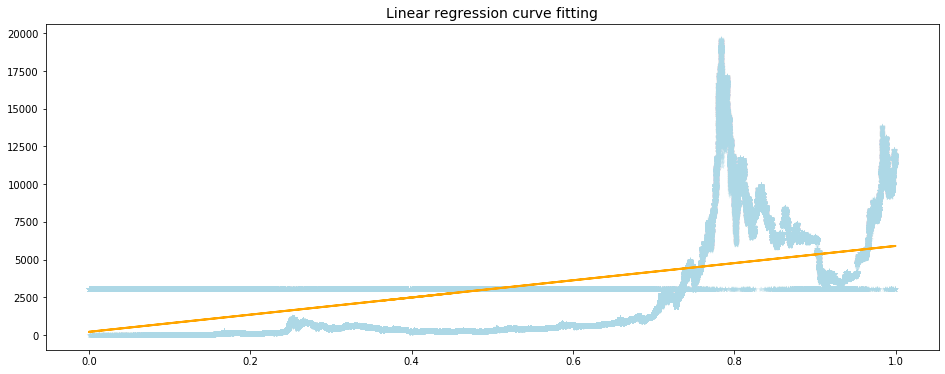

In [39]:
plt.figure(figsize=(16,6))
plt.scatter(xtest,ytest,marker='*',linewidth=0,color='lightblue',alpha=0.3)
plt.plot(xtest,y_pred,color='orange',linewidth=2)
plt.title('Linear regression curve fitting',fontsize=14)
plt.show()

In [40]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
Timestamp,,
2015-06-09 17:45:00,230.338734,2784.856144
2013-03-18 19:03:00,3059.499288,1119.899698
2012-06-18 20:36:00,6.100000,560.818382
2014-07-05 11:15:00,630.860000,2090.612312
2018-06-17 16:38:00,6509.227500,5045.756410
2015-06-05 21:09:00,224.821167,2776.664476
2016-01-04 20:50:00,434.140000,3212.870778
2014-03-05 11:25:00,666.182404,1840.766449
2018-07-19 12:34:00,7417.948119,5111.289751


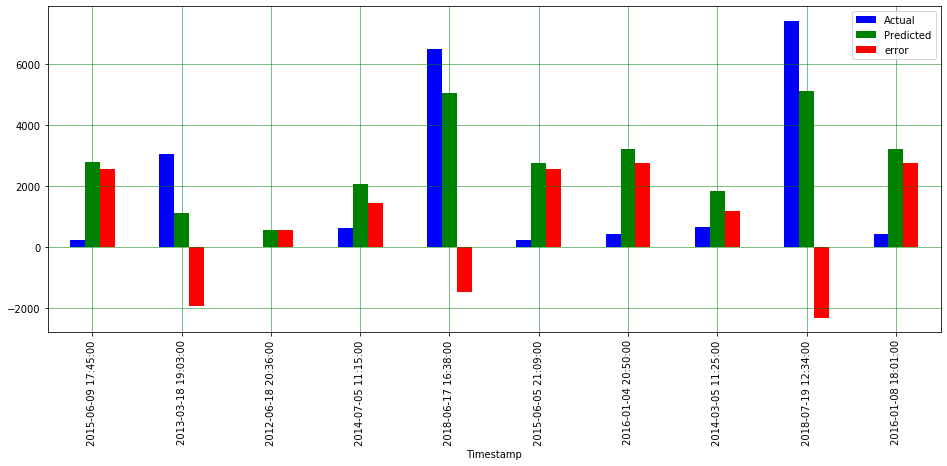

In [41]:
df['error'] = (df.Predicted - df.Actual)
result_sam = df.head(10)
result_sam.plot(kind='bar',figsize=(16,6),color={'blue','green','red'})
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [42]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
ploy_reg = PolynomialFeatures(degree=2)
x_poly=ploy_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
poly_ac = lin_reg.score(x_poly,y)
print('r squared value is :',poly_ac)

r squared value is : 0.49712704912554634


In [43]:
#Decission tree
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(xtrain,ytrain)
y_pred = tree_reg.predict(xtest)
tree_ac=tree_reg.score(xtest,ytest)
print('r squared value is :',tree_ac)

r squared value is : 0.91400384899948


In [44]:
#comparision of models
Models=['Linear regression','Polynomial regression','Decision tree']
score = [linear_accuracy,poly_ac,tree_ac]
accuracy=[]
for i in score:
    accuracy.append(round(i*100))
accuracy

[28.0, 50.0, 91.0]

In [45]:
Accuracy_of_models = pd.DataFrame({'Model':Models,'Accuracy':accuracy}).sort_values(by='Accuracy',ascending = False)
Accuracy_of_models

,Model,Accuracy
2,Decision tree,91.0
1,Polynomial regression,50.0
0,Linear regression,28.0


##### As we can see the accuracy levels are low. So, using the attributes Open, Low, High, Close and Volume_(Currency) to predict the Weighted_Price as their correlation values are higher

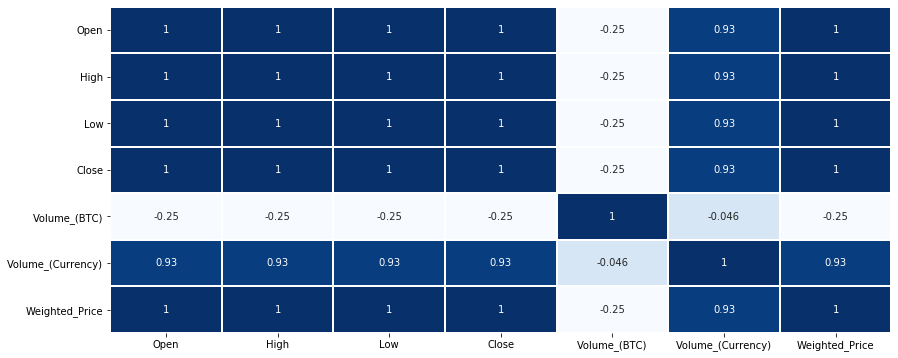

In [46]:
plt.figure(figsize=(14,6))
sns.heatmap(data=dataframe1.corr(),cbar=False,annot=True,linewidth=1,cmap='Blues')

In [47]:
x=dataframe1[['Open','High','Low','Close','Volume_(Currency)']]
pd.DataFrame(x).head()
y=dataframe1['Weighted_Price']
pd.DataFrame(x).head()

,Open,High,Low,Close,Volume_(Currency)
Timestamp,,,,,
2011-12-31,3047.034727,3049.392910,3044.408085,3047.013352,26757.534105
2012-01-31,3025.391793,3027.733153,3022.783806,3025.370506,26566.858391
2012-02-29,3017.456296,3019.791494,3014.855154,3017.435034,26497.465486
2012-03-31,3019.081055,3021.417511,3016.478512,3019.059783,26512.218919
2012-04-30,3005.920033,3008.246293,3003.328868,3005.898874,26397.343962


In [48]:
#splitting the data into training set and testing set
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)

In [49]:
#linear regression
linear_reg = LinearRegression()
linear_reg.fit(xtrain,ytrain)
y_pred = linear_reg.predict(xtest)
linear_accuracy_high_corr = linear_reg.score(xtest,ytest)
print('r squared value is ',linear_accuracy_high_corr)

r squared value is  0.9999999991613893


In [50]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
Timestamp,,
2014-10-31,856.154953,856.150741
2019-06-30,9342.968139,9342.757709
2012-03-31,3018.922959,3018.920409
2014-11-30,972.497645,972.494219
2013-07-31,1203.505948,1203.501759
2017-06-30,2635.124906,2635.178708
2017-03-31,1415.386659,1415.363735
2015-05-31,1187.788475,1187.789097
2015-08-31,1208.690856,1208.688836


* As we can see that both the predicted and original values almost same. The accuracy is also excellent.

In [51]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
ploy_reg = PolynomialFeatures(degree=2)
x_poly=ploy_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
poly_ac_high_corr = lin_reg.score(x_poly,y)
print('r squared value is :',poly_ac_high_corr)

r squared value is : 0.9999999999874449


In [52]:
#Decission tree
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(xtrain,ytrain)
y_pred = tree_reg.predict(xtest)
tree_ac_high_corr=tree_reg.score(xtest,ytest)
print('r squared value is :',tree_ac_high_corr)

r squared value is : 0.9982756355966461


In [53]:
#comparision of models
Models=['Linear regression','Polynomial regression','Decision tree']
score = [linear_accuracy_high_corr,poly_ac_high_corr,tree_ac_high_corr]
accuracy=[]
for i in score:
    accuracy.append(round(i*100))
accuracy

[100.0, 100.0, 100.0]

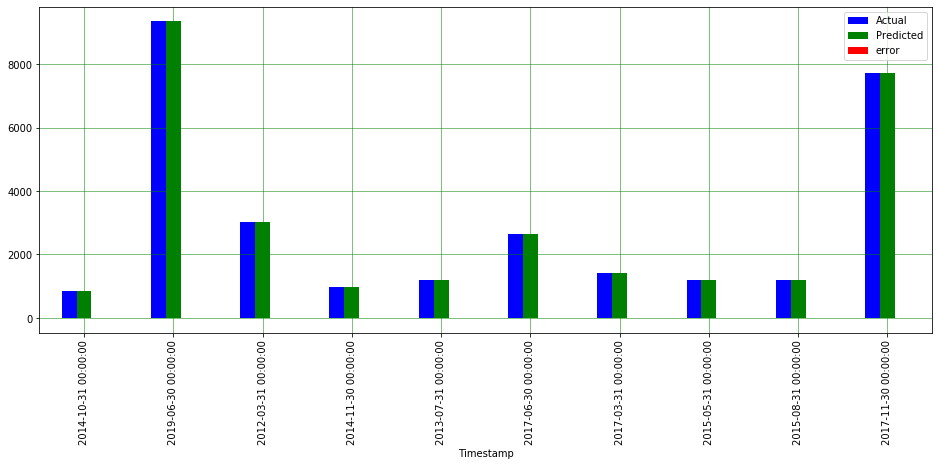

In [54]:
df['error'] = (df.Predicted - df.Actual)
result_sam = df.head(10)
result_sam.plot(kind='bar',figsize=(16,6),color={'blue','green','red'})
#.set_xticklabels(bar.get_xticklabels(), fontsize=14, rotation=70)
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [55]:
Accuracy_of_models = pd.DataFrame({'Model':Models,'Accuracy':accuracy}).sort_values(by='Accuracy',ascending = False) #changing into dataframe.
Accuracy_of_models   

,Model,Accuracy
0,Linear regression,100.0
1,Polynomial regression,100.0
2,Decision tree,100.0


* R2 shows how well terms (data points) fit a curve or line

In [56]:
r2_score(ytest,y_pred)

0.998275635596646

##### We can see that the prediction models are very accurate and predicts the weighted_price with minute or no error.

###                                 THE END

* Kondareddy Thanigundala  <br>  kondareddyt@am.students.amrita.edu <br> Ph no : 9100154155